# Lab 1
Student: **John Wu**

In [1]:
import sys, re, numpy as np
import matplotlib.pyplot as plt
from collections import Counter

Read in files

In [47]:
sentFile = './data/sentences.txt'
tokFile = './data/tokens.txt'

with open(tokFile) as f:
    tokBlob = f.read() # read entire blob

with open(sentFile) as f:
    sentLines = f.read().splitlines() # read entire blob

## (a) Tokenization

__Description of Processing__

Use regular expressions in an attempt to match patterns of tokens in the input file. The regex will match the following items (in order of priority):
* Various contractions ending in a period captured as one token (e.g. Dr., Mr., St.)
* Twitter-like hashtags beginning with pound sign and alphanumeric characters
* dollar amounts in the form of `$2.534` or `$5`
* E-mail addresses in the form of alphanumerics@alphanumerics.alphanumerics
* Acronym in the form of `A.B.C.D.E.` up to an arbitrary amount
* Consecutive alphanumeric characters (e.g. `[a-zA-Z0-9_]`)
* Alphanumeric characters surrounding period, comma, colon, apostrophe, slashes, and hyphen (e.g. `I'm`, `do-rag`, `will.i.am`, `AC/DC`, and `www.ab-inbev.com` each as as one token)
* Consecutive punctuations including the following: `[].,;:"'?()-_`, to match single and multi-character punctuations (e.g. ellipsis and em-dashes), as well as emoticons, such as `:(`.

In [3]:
pat = r''' Dr\. | Mr\. | Mrs\. | Ms\. | St\. | Mt\. # matches various contractions
    | \#\w+                                         # matches hashtags like on Twitter
    | \$\d+(?:\.\d+)                                # matches dollar decimals
    | \w+\@\w+\.\w+                                 # matches e-mails
    | \w(?:\.\w)+\.                                 # matches acronyms
    | \w+(?:[/\.,’:\'—-]\w+)*%*                     # general match
    | [*[\]!<>=^{}|&.,;:?()_\"\'\-]+                # consecutive punctuations
    '''
tokenize = re.compile(pat, flags=re.I|re.X)

################################################################################
#tokenize.findall('adg 23:245 I\'m groot, U.S.A. 2*3 HIV+ #abc, 12.4% 4534=4534 A&W')

__Errors and Undesirable Results__

Initially, I separated the file with strings of whitespaces and also captured all punctuations separately. However, this lead to cases where words with punctuation within it (such as URL and hyphenated words) were split up as separate tokens. I added regex to capture for single punctuation being surrounded by alphanumeric strings as one token. The list of punctuation to be included in this scheme was discovered via trail and error. I initially started with just hypens and periods, but found special cases like colon (for timestamps like `12:45`), slashes, and apostrophes. Further complicating this is that sometimes single quotes are used as apostrophes, as em-dashes used for hyphens.

The next thing I noticed was that e-mails would be captured as two tokens before and after the at sign, so a case for e-mail was added. With this, I also added special cases for Twitter-like hashtags as well as dollar amounts to the case of $2.53. Lastly, I also noticed that several contractions like "Dr." would be tokenized as 'Dr' and '.', so I added a list of special cases for common contractions. Noticing that sometimes acronyms may have a period at the end, I also added a special case for them.

Unfortunately, despite all the work, many undesirable results still may remain. For example, for tokens using symbols like "HIV+" or other currencies like "¥400", the tokenizer will still fail. Moreover, there are many possible contractions that I had not taken care of, such as "Sgt.", "Fr.", or "Ct.". It also cannot distinguish between the last period of an acronym vs. an actual period.


__Demonstration of Results__

The first ten sentences (manually counted) are shown below:

In [4]:
print(repr(tokBlob[:345]))

"Russian for plastic bag is полиэтиленовый пакет. 7.3 out of 10 statistics is made up. I do not like green eggs and ham.I do\nnot like them Sam-I-Am. Dr. Mulholland lives on Mulholland Dr. in Hollywood. 1, 2, 3... slashdot.com has some interesting\narticles. I'm going to update my resumé. J.H.U. has a great la-crosse team. Born in the U.S. of A. "


The result of tokenization are presented below

In [5]:
print(tokenize.findall(tokBlob[:345]))

['Russian', 'for', 'plastic', 'bag', 'is', 'полиэтиленовый', 'пакет', '.', '7.3', 'out', 'of', '10', 'statistics', 'is', 'made', 'up', '.', 'I', 'do', 'not', 'like', 'green', 'eggs', 'and', 'ham.I', 'do', 'not', 'like', 'them', 'Sam-I-Am', '.', 'Dr.', 'Mulholland', 'lives', 'on', 'Mulholland', 'Dr.', 'in', 'Hollywood', '.', '1', ',', '2', ',', '3', '...', 'slashdot.com', 'has', 'some', 'interesting', 'articles', '.', "I'm", 'going', 'to', 'update', 'my', 'resumé', '.', 'J.H.U.', 'has', 'a', 'great', 'la-crosse', 'team', '.', 'Born', 'in', 'the', 'U.S.', 'of', 'A', '.']


## (b) Corpus Statistics

Processing tokens

In [6]:
vocabs = Counter(tokenize.findall(tokBlob)) # counter is set with counts

Number of lines processed

In [7]:
tokBlob.count('\n')

944802

Vocabulary Size

In [8]:
len(vocabs)

449548

Collection Size

In [9]:
sum(vocabs.values())

22233607

__Most common types__

List of most common types at rank 1-100

In [10]:
tmp = vocabs.most_common(10000)
for n in range(100):
    print('%d: %s'%(n+1,tmp[n][0]))

1: the
2: .
3: ,
4: to
5: and
6: of
7: a
8: in
9: for
10: is
11: that
12: on
13: The
14: with
15: was
16: at
17: be
18: as
19: I
20: are
21: it
22: said
23: have
24: from
25: by
26: will
27: "
28: has
29: this
30: he
31: not
32: an
33: :
34: his
35: you
36: their
37: or
38: they
39: but
40: we
41: who
42: more
43: (
44: about
45: were
46: all
47: had
48: been
49: one
50: up
51: can
52: out
53: her
54: also
55: would
56: our
57: which
58: people
59: time
60: when
61: she
62: )
63: its
64: ?
65: We
66: He
67: your
68: It
69: there
70: than
71: years
72: so
73: two
74: what
75: them
76: In
77: year
78: just
79: into
80: other
81: like
82: do
83: new
84: first
85: A
86: my
87: over
88: some
89: after
90: This
91: if
92: get
93: ,"
94: no
95: only
96: ."
97: But
98: last
99: could
100: many


Most common at 500, 1000, 5000, and 10000

In [11]:
print('500: %s'%tmp[499][0])
print('1000: %s'%tmp[999][0])
print('5000: %s'%tmp[4999][0])
print('10000: %s'%tmp[9999][0])

500: 6
1000: organization
5000: elite
10000: Fayetteville


__Hapex legomena__


In [12]:
tmp = [s for s,c in vocabs.items() if c==1]
print('%d words or %.2f%% of vocab.'%(len(tmp),len(tmp)/len(vocabs)*100))

267240 words or 59.45% of vocab.


## (c) Zipf's Law

In [29]:
tmp = vocabs.most_common(len(vocabs))
plotY = np.log(np.array([c for s,c in tmp]))
plotX = np.log(np.arange(len(vocabs))+1)

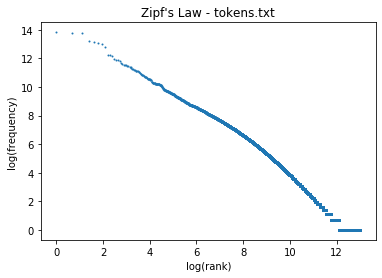

In [32]:
plt.scatter(plotX, plotY, s=1)
plt.title("Zipf's Law - tokens.txt")
plt.xlabel('log(rank)')
plt.ylabel('log(frequency)')
plt.show()

Based on visual examination, the corpus as tokenized by my tokenizer somewhat follows Zipf's Law, as the plot is generally inversely proportional between log of frequency and log of rank. However, there are anonmalies at the very high and the very low ranks are apparent, and the fact that there seem to be an inflection point at the middle of the distribution. With these, it is unlikely that the data would pass something like a chi-square test for Zipf's distribution. It seems that this empirical distribution is piece-wise linear with a spline at around rank 1100 ($~e^7$) or so.

In [48]:
sentLines[0]

"Don't sweat the small stuff. Last fall, it hired de Nysschen, one of the industry’s most prominent leaders, who helped lead Audi of America to sales heights before Nissan chose him to lead its Infiniti division from offices in Hong Kong."